In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
url = "http://localhost:8000/"
optiontable = {"page_load_strategy":["normal","eager","none"]}

def edge_test(n=10, backend="wasm", arguments={"page_load_strategy":"normal"}):
    option = webdriver.EdgeOptions()
    option.add_argument("headless")
    option.add_argument("--enable-javascript")
    option.add_argument("--use-gl")
    option.page_load_strategy = arguments["page_load_strategy"]
    driver = webdriver.Edge(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n})')
    driver.quit()
    return data
def chrome_test(n=10, backend="wasm", arguments={"page_load_strategy":"normal"}):
    option = webdriver.ChromeOptions()
    option.add_argument("headless")
    option.add_argument("--enable-javascript")
    option.add_argument("--use-gl")
    option.page_load_strategy = arguments["page_load_strategy"]
    driver = webdriver.Chrome(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n})')
    driver.quit()
    return data
def firefox_test(n=10, backend="wasm", arguments={"page_load_strategy":"normal"}):
    option = webdriver.FirefoxOptions()
    option.add_argument('-headless')
    option.page_load_strategy = arguments["page_load_strategy"]
    # option.add_argument("--enable-javascript")
    # option.add_argument("--use-gl")
    driver = webdriver.Firefox(options = option)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n})')
    driver.quit()
    return data

In [10]:
edge_data = {}
for mode in optiontable["page_load_strategy"]:
    edge_data[mode] = []
    for i in tqdm(range(10), f"edge test with {mode} mode"):
        edge_data[mode] += edge_test(arguments={"page_load_strategy":mode})

edge test with none mode:   0%|          | 0/10 [00:01<?, ?it/s]


JavascriptException: Message: javascript error: start is not defined
  (Session info: headless MicrosoftEdge=109.0.1518.78)
Stacktrace:
Backtrace:
	Microsoft::Applications::Events::EventProperties::SetProperty [0x00007FF6C2DF16C2+15186]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2D8A212+827554]
	(No symbol) [0x00007FF6C2A4ED90]
	(No symbol) [0x00007FF6C2A52D9A]
	(No symbol) [0x00007FF6C2A52AC9]
	(No symbol) [0x00007FF6C2A53B10]
	(No symbol) [0x00007FF6C2ACC4E2]
	(No symbol) [0x00007FF6C2AB1F4A]
	(No symbol) [0x00007FF6C2A84C3E]
	(No symbol) [0x00007FF6C2ACB513]
	(No symbol) [0x00007FF6C2AB1D23]
	(No symbol) [0x00007FF6C2A83B80]
	(No symbol) [0x00007FF6C2A82B0E]
	(No symbol) [0x00007FF6C2A84344]
	Microsoft::Applications::Events::EventProperties::SetProperty [0x00007FF6C2C6C3B0+182752]
	(No symbol) [0x00007FF6C2B40095]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2CCA6EA+42362]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2CCD425+53941]
	Microsoft::Applications::Events::ILogManager::DispatchEventBroadcast [0x00007FF6C2FE8AB3+1456595]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2D9276A+861690]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2D97854+882404]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2D979AC+882748]
	Microsoft::Applications::Events::EventProperty::EventProperty [0x00007FF6C2DA097E+919566]
	BaseThreadInitThunk [0x00007FF89ABF55A0+16]
	RtlUserThreadStart [0x00007FF89BE0485B+43]


In [11]:
chrome_data = {}
for mode in optiontable["page_load_strategy"]:
    chrome_data[mode] = []
    for i in tqdm(range(10), f"chrome test with {mode} mode"):
        chrome_data[mode] += chrome_test(arguments={"page_load_strategy":mode})

chrome test with none mode:   0%|          | 0/10 [00:01<?, ?it/s]


JavascriptException: Message: javascript error: start is not defined
  (Session info: headless chrome=109.0.5414.120)
Stacktrace:
Backtrace:
	(No symbol) [0x002A6643]
	(No symbol) [0x0023BE21]
	(No symbol) [0x0013DA9D]
	(No symbol) [0x001409E4]
	(No symbol) [0x001408AD]
	(No symbol) [0x001412E5]
	(No symbol) [0x001A79F7]
	(No symbol) [0x0018FD7C]
	(No symbol) [0x001A6B09]
	(No symbol) [0x0018FB76]
	(No symbol) [0x001649C1]
	(No symbol) [0x00165E5D]
	GetHandleVerifier [0x0051A142+2497106]
	GetHandleVerifier [0x005485D3+2686691]
	GetHandleVerifier [0x0054BB9C+2700460]
	GetHandleVerifier [0x00353B10+635936]
	(No symbol) [0x00244A1F]
	(No symbol) [0x0024A418]
	(No symbol) [0x0024A505]
	(No symbol) [0x0025508B]
	BaseThreadInitThunk [0x75876BD9+25]
	RtlGetFullPathName_UEx [0x77288FD2+1218]
	RtlGetFullPathName_UEx [0x77288F9D+1165]
	(No symbol) [0x00000000]


In [12]:
firefox_data = {}
for mode in optiontable["page_load_strategy"]:
    firefox_data[mode] = []
    for i in tqdm(range(10), f"firefox test with {mode} mode"):
        firefox_data[mode] += firefox_test(arguments={"page_load_strategy":mode})

firefox test with none mode:   0%|          | 0/10 [00:04<?, ?it/s]


JavascriptException: Message: ReferenceError: start is not defined
Stacktrace:
@moz-nullprincipal:{a15c3c3e-a0b7-4eb3-8397-5784a2193764}:2:7
@moz-nullprincipal:{a15c3c3e-a0b7-4eb3-8397-5784a2193764}:3:8


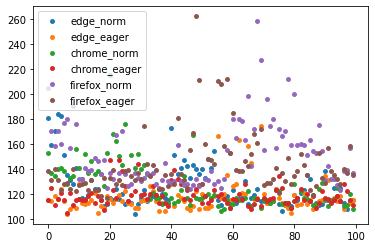

In [14]:
plt.scatter(range(len(edge_data["normal"])), edge_data["normal"], s=15, label="edge_norm")
plt.scatter(range(len(edge_data["eager"])), edge_data["eager"], s=15, label="edge_eager")
plt.scatter(range(len(chrome_data["normal"])), chrome_data["normal"], s=15, label="chrome_norm")
plt.scatter(range(len(chrome_data["eager"])), chrome_data["eager"], s=15, label="chrome_eager")
plt.scatter(range(len(firefox_data["normal"])), firefox_data["normal"], s=15, label="firefox_norm")
plt.scatter(range(len(firefox_data["eager"])), firefox_data["eager"], s=15, label="firefox_eager")
plt.legend()

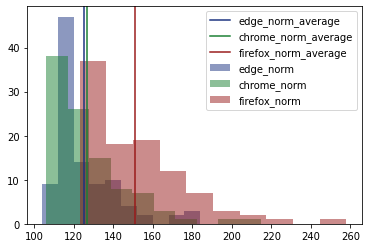

In [29]:
plt.hist(edge_data["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
# plt.hist(edge_data["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
plt.hist(chrome_data["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
# plt.hist(chrome_data["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
plt.hist(firefox_data["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
# plt.hist(firefox_data["eager"], alpha=.5, bins=10, color=(0.5, 0.2, 0.1), label="firefox_eager")
plt.axvline(sum(edge_data["normal"])/len(edge_data["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
# plt.axvline(sum(edge_data["eager"])/len(edge_data["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
plt.axvline(sum(chrome_data["normal"])/len(chrome_data["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
# plt.axvline(sum(chrome_data["eager"])/len(chrome_data["eager"]), c="orange", label="chrome_eager_average")
plt.axvline(sum(firefox_data["normal"])/len(firefox_data["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
# plt.axvline(sum(firefox_data["eager"])/len(firefox_data["eager"]), c="g", label="firefox_eager_average")
plt.legend()

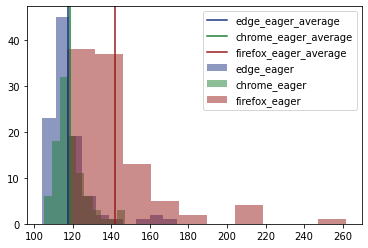

In [31]:
# plt.hist(edge_data["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
plt.hist(edge_data["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
# plt.hist(chrome_data["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
plt.hist(chrome_data["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
# plt.hist(firefox_data["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
plt.hist(firefox_data["eager"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_eager")
# plt.axvline(sum(edge_data["normal"])/len(edge_data["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
plt.axvline(sum(edge_data["eager"])/len(edge_data["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
# plt.axvline(sum(chrome_data["normal"])/len(chrome_data["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
plt.axvline(sum(chrome_data["eager"])/len(chrome_data["eager"]), c=(0.1, 0.5, 0.2), label="chrome_eager_average")
# plt.axvline(sum(firefox_data["normal"])/len(firefox_data["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
plt.axvline(sum(firefox_data["eager"])/len(firefox_data["eager"]), c=(0.6, 0.1, 0.1), label="firefox_eager_average")
plt.legend()

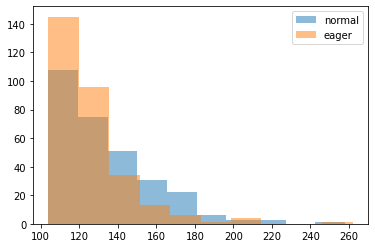

In [33]:
plt.hist(edge_data["normal"]+chrome_data["normal"]+firefox_data["normal"], alpha=.5, bins=10, label="normal")
plt.hist(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(edge_data["normal"]+chrome_data["normal"]+firefox_data["normal"])/
            len(edge_data["normal"]+chrome_data["normal"]+firefox_data["normal"]), c='b', label="edge_norm_average")
plt.legend()